### Scenario design analysis

This is a short aside, showing some features of powersimdata that could be useful in the design phase.
See the [analyze section](https://breakthrough-energy.github.io/docs/powersimdata/index.html#analyzing-scenario-designs) from the docs for more info

In [1]:
from powersimdata.scenario.scenario import Scenario
scenario = Scenario(2497)

SCENARIO: Terrapower | Western_90pctclean_10pctnuclear_0pctflex_OB1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


### Some pre-built functions in PowerSimData to get useful statistics

The `powersimdata.design` package contains utilities for analysis which is primarily useful in the design phase. This typically 
involves using the base grid, or base grid with change table applied as the input, and various data or plots as the output.

In [2]:
from powersimdata.design.transmission.mwmiles import calculate_mw_miles
calculate_mw_miles(scenario)

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


{'mw_miles': 0,
 'transformer_mw': 60887.802202759,
 'num_lines': 0,
 'num_transformers': 198}

In [3]:
from powersimdata.design.transmission.statelines import classify_interstate_intrastate
labels = classify_interstate_intrastate(scenario)

In [4]:
# limit output for brevity
{k: v[:10] for k,v in labels.items()}

{'interstate': [],
 'intrastate': [90277,
  90916,
  90917,
  90972,
  90973,
  90980,
  91085,
  91086,
  91087,
  91117]}

In [5]:
from powersimdata.design.generation.cost_curves import get_supply_data
grid = scenario.get_grid()

In [6]:
get_supply_data?

Signature: get_supply_data(grid, num_segments=1, save=None)
Docstring:
Accesses the generator cost and plant information data from a specified Grid
object.

:param powersimdata.input.grid.Grid grid: Grid object.
:param int num_segments: The number of segments into which the piecewise linear
    cost curve will be split.
:param str save: Saves a .csv if a str representing a valid file path and file
    name is provided. If None, nothing is saved.
:return: (*pandas.DataFrame*) -- Supply information needed to analyze cost and
    supply curves.
:raises TypeError: if a powersimdata.input.grid.Grid object is not input, or
    if the save parameter is not input as a str.
File:      /PowerSimData/powersimdata/design/generation/cost_curves.py
Type:      function


In [7]:
supply_df = get_supply_data(grid, 1)

In [8]:
supply_df

,type,interconnect,zone_name,c2,c1,c0,p1,f1,p2,f2,p_diff1,slope1
plant_id,,,,,,,,,,,,
10390,hydro,Western,Washington,0.0,0.0,0.0,0.000000,0.0,162.972196,0.0,162.972196,0.0
10391,hydro,Western,Washington,0.0,0.0,0.0,0.000000,0.0,162.969126,0.0,162.969126,0.0
10392,hydro,Western,Washington,0.0,0.0,0.0,0.000000,0.0,162.969126,0.0,162.969126,0.0
10393,hydro,Western,Washington,0.0,0.0,0.0,0.000000,0.0,162.969126,0.0,162.969126,0.0
10394,hydro,Western,Washington,0.0,0.0,0.0,0.000000,0.0,162.969126,0.0,162.969126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14021,nuclear,Western,Southwest California,0.0,0.0,0.0,618.903408,0.0,651.477272,0.0,32.573864,0.0
14022,nuclear,Western,Washington,0.0,0.0,0.0,618.903408,0.0,651.477272,0.0,32.573864,0.0
14023,nuclear,Western,Washington,0.0,0.0,0.0,618.903408,0.0,651.477272,0.0,32.573864,0.0


In [9]:
from powersimdata.design.generation.cost_curves import build_supply_curve

In [10]:
build_supply_curve?

Signature:
build_supply_curve(
    grid,
    num_segments,
    area,
    gen_type,
    area_type=None,
    plot=True,
)
Docstring:
Builds a supply curve for a specified area and generation type.

:param powersimdata.input.grid.Grid grid: Grid object.
:param int num_segments: The number of segments into which the piecewise linear
    cost curve is split.
:param str area: Either the load zone, state name, state abbreviation, or
    interconnect.
:param str gen_type: Generation type.
:param str area_type: one of: *'loadzone'*, *'state'*, *'state_abbr'*,
    *'interconnect'*. Defaults to None, which allows
    :func:`powersimdata.network.model.area_to_loadzone` to infer the type.
:param bool plot: If True, the supply curve plot is shown. If False, the plot is
    not shown.
:return: (*tuple*) -- First element is a list of capacity (MW) amounts needed
    to create supply curve. Second element is a list of bids ($/MW) in the supply
    curve.
:raises TypeError: if a powersimdata.input.grid.

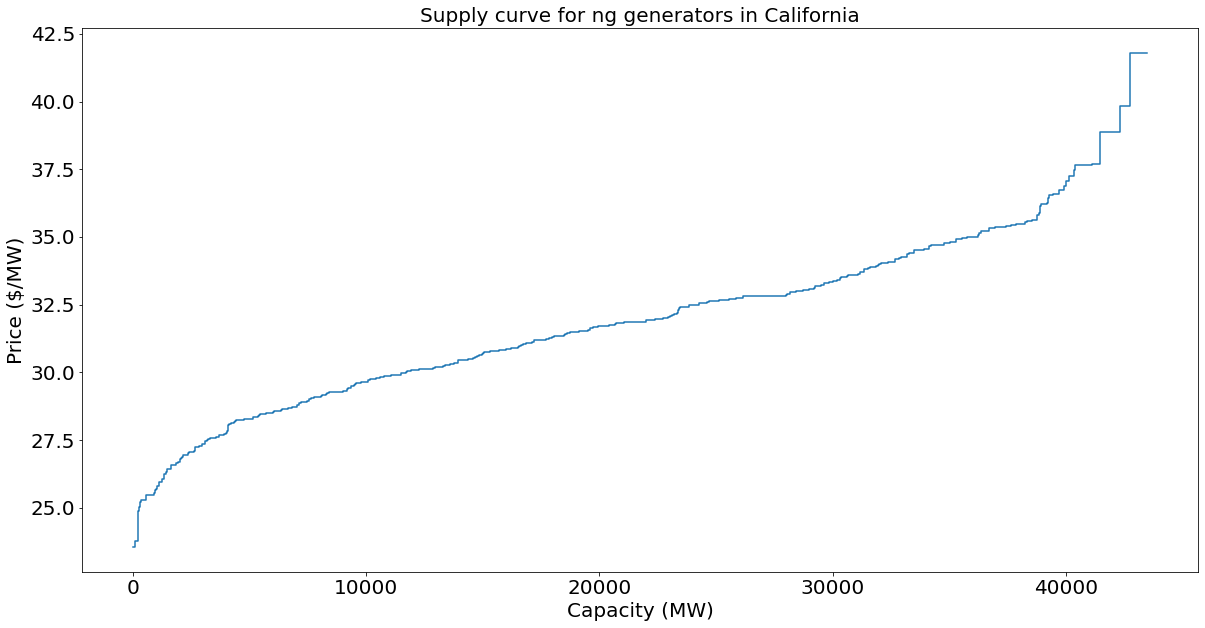

In [11]:
P, F = build_supply_curve(grid, 1, 'California', 'ng')

In [12]:
from powersimdata.design.generation.cost_curves import ks_test

In [13]:
ks_test?

Signature:
ks_test(
    capacity_data1,
    price_data1,
    capacity_data2,
    price_data2,
    area=None,
    gen_type=None,
    plot=True,
)
Docstring:
Runs a test that is similar to the Kolmogorov-Smirnov test. This function takes
two supply curves as inputs and returns the greatest difference in price between
the two supply curves. This function requires that the supply curves offer the same
amount of capacity.

:param list capacity_data1: List of capacity values for the first supply curve.
:param list price_data1: List of price values for the first supply curve.
:param list capacity_data2: List of capacity values for the second supply curve.
:param list price_data2: List of price values for the second supply curve.
:param str area: Either the load zone, state name, state abbreviation, or
    interconnect. Defaults to None because it's not essential.
:param str gen_type: Generation type. Defaults to None because it's not essential.
:param bool plot: If True, the supply curve plot

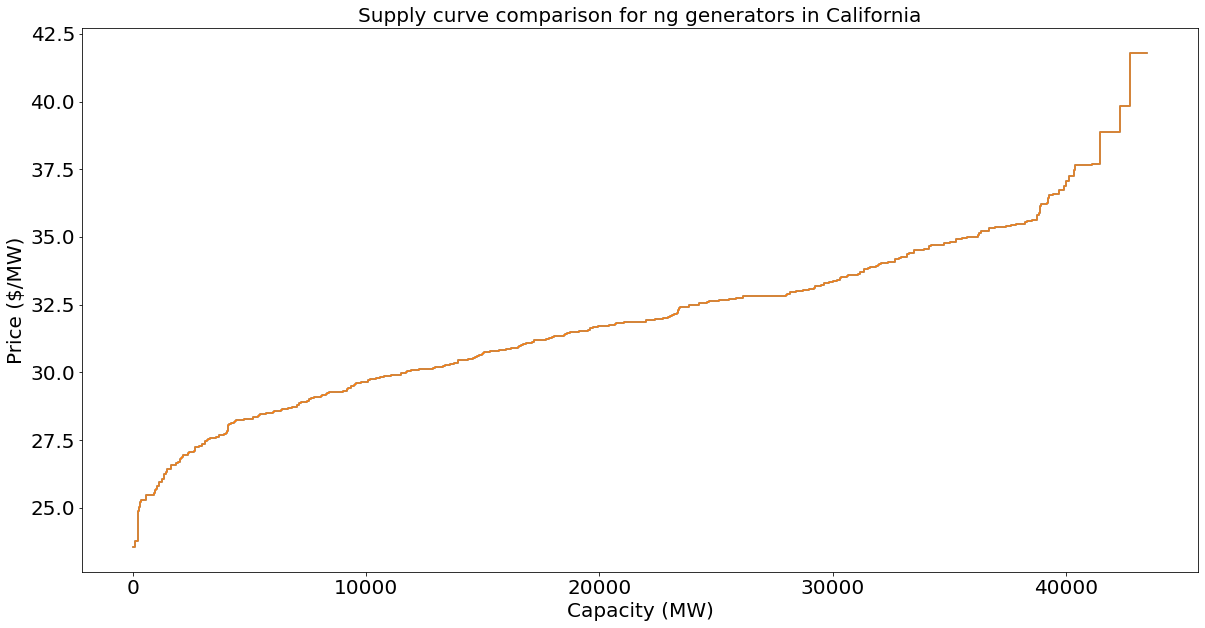

0.0

In [14]:
max_diff = ks_test(P, F, P, F, 'California', 'ng')
max_diff

In [18]:
from powersimdata.design.generation.cost_curves import plot_capacity_vs_price

In [19]:
plot_capacity_vs_price?

Signature:
plot_capacity_vs_price(
    grid,
    num_segments,
    area,
    gen_type,
    area_type=None,
    plot=True,
)
Docstring:
Plots the generator capacity vs. the generator price for a specified area
    and generation type.

:param powersimdata.input.grid.Grid grid: Grid object.
:param int num_segments: The number of segments into which the piecewise linear
    cost curve is split.
:param str area: Either the load zone, state name, state abbreviation, or
    interconnect.
:param str gen_type: Generation type.
:param str area_type: one of: *'loadzone'*, *'state'*, *'state_abbr'*,
    *'interconnect'*. Defaults to None, which allows
    :func:`powersimdata.network.model.area_to_loadzone` to infer the type.
:param bool plot: If True, the supply curve plot is shown. If False, the plot is
    not shown.
:return: (*None*) -- The capacity vs. price plot is displayed according to the user.
:raises TypeError: if a powersimdata.input.grid.Grid object is not input.
:raises ValueError: i

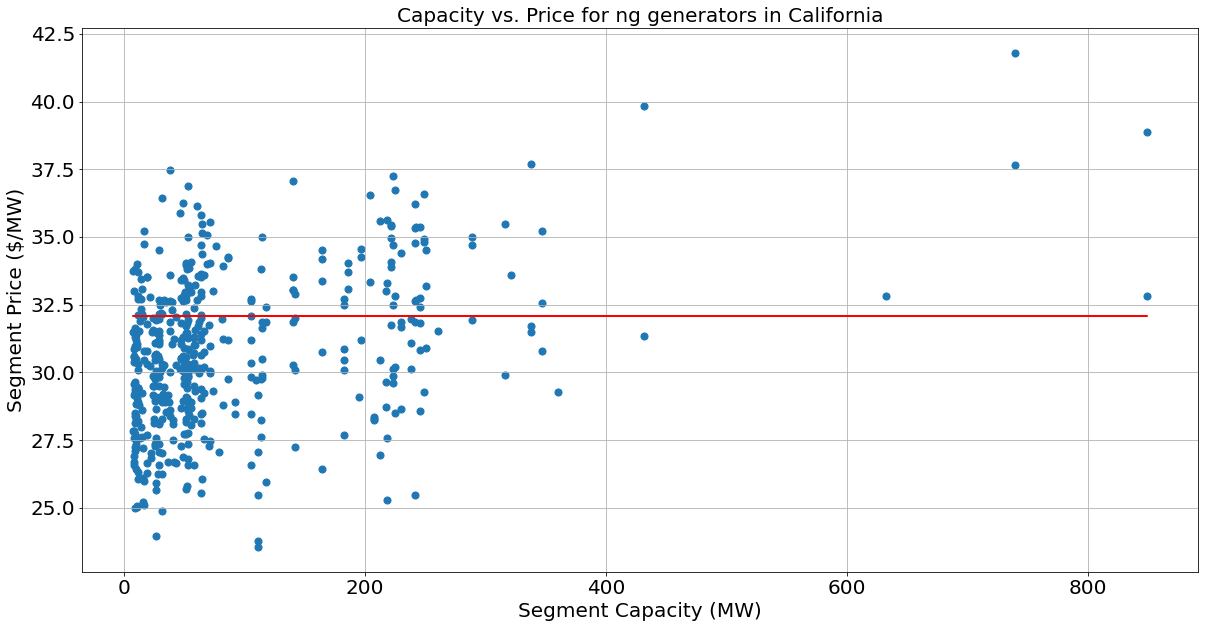

In [20]:
plot_capacity_vs_price(grid, 1, 'California', 'ng')